In [ ]:
import pandas as pd       # pandas library 불러내기
import numpy as np        # numpy library 불러내기
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/project/players_1920_fin.csv')
df.head(3)

,Unnamed: 0,assists,bonus,bps,clean_sheets,creativity,element,fixture,goals_conceded,goals_scored,...,total_points,transfers_balance,transfers_in,transfers_out,value,was_home,yellow_cards,full,team,ppm
0,1,0,0,1,0,0.1,534,37,1,0,...,1,0,0,0,4.5,False,0,Aaron Connolly,Brighton,0.222222
1,2,0,0,1,0,0.3,534,43,1,0,...,1,10589,13500,2911,4.5,True,0,Aaron Connolly,Brighton,0.222222
2,3,0,0,1,0,4.8,534,58,0,0,...,1,8090,11749,3659,4.5,False,0,Aaron Connolly,Brighton,0.222222


In [ ]:
df = df.rename(columns={'Unnamed: 0' : 'id'})

In [ ]:
df.shape

(22502, 35)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22502 entries, 0 to 22501
Data columns (total 35 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 22502 non-null  int64  
 1   assists            22502 non-null  int64  
 2   bonus              22502 non-null  int64  
 3   bps                22502 non-null  int64  
 4   clean_sheets       22502 non-null  int64  
 5   creativity         22502 non-null  float64
 6   element            22502 non-null  int64  
 7   fixture            22502 non-null  int64  
 8   goals_conceded     22502 non-null  int64  
 9   goals_scored       22502 non-null  int64  
 10  ict_index          22502 non-null  float64
 11  influence          22502 non-null  float64
 12  kickoff_time       22502 non-null  object 
 13  minutes            22502 non-null  int64  
 14  opponent_team      22502 non-null  object 
 15  own_goals          22502 non-null  int64  
 16  penalties_missed   225

In [ ]:
df['id'].isnull().sum()

0

In [ ]:
n = len(pd.unique(df['id']))
print(n)

22502


In [ ]:
df['creativity'].describe()

count    22502.000000
mean         4.848378
std         10.832486
min          0.000000
25%          0.000000
50%          0.000000
75%          2.800000
max        133.500000
Name: creativity, dtype: float64

In [ ]:
df.loc[df['creativity'] >=0.5, "creativity_B"] =1
df.loc[df['creativity'] <0.5, "creativity_B"] =0

In [ ]:
df['creativity_B'].value_counts(dropna=False, normalize=True)

0.0    0.633677
1.0    0.366323
Name: creativity_B, dtype: float64

In [ ]:
# 타겟변수 비율 검토
#df['creativity'].value_counts(dropna=False, normalize=True)

In [ ]:
cols = ['assists','bonus','goals_conceded','goals_scored','influence', 'minutes','penalties_saved',
        'saves','team_a_score','team_h_score','threat','total_points', 'ppm']
df[cols].dtypes
#ppm (Points per Match)
# 제외 컬럼 : bps, element, fixture, ict_index, round, selected, tansfers_balance, transfers_in, tansfers_out, value, kickoff Time

assists              int64
bonus                int64
goals_conceded       int64
goals_scored         int64
influence          float64
minutes              int64
penalties_saved      int64
saves                int64
team_a_score         int64
team_h_score         int64
threat               int64
total_points         int64
ppm                float64
dtype: object

In [ ]:
df[cols].describe()

,assists,bonus,goals_conceded,goals_scored,influence,minutes,penalties_saved,saves,team_a_score,team_h_score,threat,total_points,ppm
count,22502.000000,22502.000000,22502.000000,22502.000000,22502.000000,22502.000000,22502.000000,22502.000000,22502.000000,22502.000000,22502.000000,22502.000000,22502.000000
mean,0.040041,0.107902,0.505466,0.044485,7.396116,33.292107,0.000755,0.098791,1.199404,1.513821,5.589725,1.378189,0.249703
std,0.211752,0.490432,0.955543,0.230016,12.883909,40.671211,0.029049,0.640450,1.190049,1.245430,14.070831,2.502970,0.445899
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.000000,-1.250000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,1.000000,0.000000,11.200000,90.000000,0.000000,0.000000,2.000000,2.000000,2.000000,2.000000,0.333333
max,3.000000,3.000000,9.000000,4.000000,144.000000,90.000000,2.000000,12.000000,9.000000,8.000000,181.000000,26.000000,4.468085


In [ ]:
# 구간 변수
cols1 = ['clean_sheets','opponent_team', 'own_goals', 'penalties_missed','red_cards','was_home', 'yellow_cards', 'team']
df[cols1].dtypes

clean_sheets         int64
opponent_team       object
own_goals            int64
penalties_missed     int64
red_cards            int64
was_home              bool
yellow_cards         int64
team                object
dtype: object

In [ ]:
df[cols].skew()
#assist, bonus, goals_Scored, penalties_saved, saves, threat

assists             5.806313
bonus               4.837941
goals_conceded      2.392690
goals_scored        5.939102
influence           2.536058
minutes             0.534550
penalties_saved    41.625927
saves               7.956761
team_a_score        1.504778
team_h_score        0.936209
threat              3.823514
total_points        2.757586
ppm                 2.636021
dtype: float64

In [ ]:
col = ['assists','bonus','goals_scored','penalties_saved','saves','threat']
col_log = df[col].transform(lambda x: np.log(x+1))
col_log.describe()

,assists,bonus,goals_scored,penalties_saved,saves,threat
count,22502.000000,22502.000000,22502.000000,22502.000000,22502.000000,22502.000000
mean,0.026871,0.057130,0.029439,0.000511,0.041655,0.744974
std,0.138732,0.248281,0.147092,0.019330,0.243949,1.267869
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,1.098612
max,1.386294,1.386294,1.609438,1.098612,2.564949,5.204007


In [ ]:
col_log.skew()
# threat 뺴고 모두 3이 넘으므로 threat만 남김

assists             5.171019
bonus               4.382334
goals_scored        5.065826
penalties_saved    38.817992
saves               6.193471
threat              1.444424
dtype: float64

In [ ]:
cols = ['goals_conceded','influence', 'minutes','team_a_score','team_h_score','total_points', 'ppm', 'threat']
df['threat'] = df['threat'].transform(lambda x: np.log(x+1))
df[cols].describe()

,goals_conceded,influence,minutes,team_a_score,team_h_score,total_points,ppm,threat
count,22502.000000,22502.000000,22502.000000,22502.000000,22502.000000,22502.000000,22502.000000,22502.000000
mean,0.505466,7.396116,33.292107,1.199404,1.513821,1.378189,0.249703,0.744974
std,0.955543,12.883909,40.671211,1.190049,1.245430,2.502970,0.445899,1.267869
min,0.000000,0.000000,0.000000,0.000000,0.000000,-6.000000,-1.250000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,11.200000,90.000000,2.000000,2.000000,2.000000,0.333333,1.098612
max,9.000000,144.000000,90.000000,9.000000,8.000000,26.000000,4.468085,5.204007


In [ ]:
df[cols].skew()

goals_conceded    2.392690
influence         2.536058
minutes           0.534550
team_a_score      1.504778
team_h_score      0.936209
total_points      2.757586
ppm               2.636021
threat            1.444424
dtype: float64

In [ ]:
df[cols].kurtosis()

goals_conceded    7.561119
influence         8.751411
minutes          -1.610718
team_a_score      4.872359
team_h_score      1.435998
total_points      9.349458
ppm               8.308073
threat            0.652287
dtype: float64

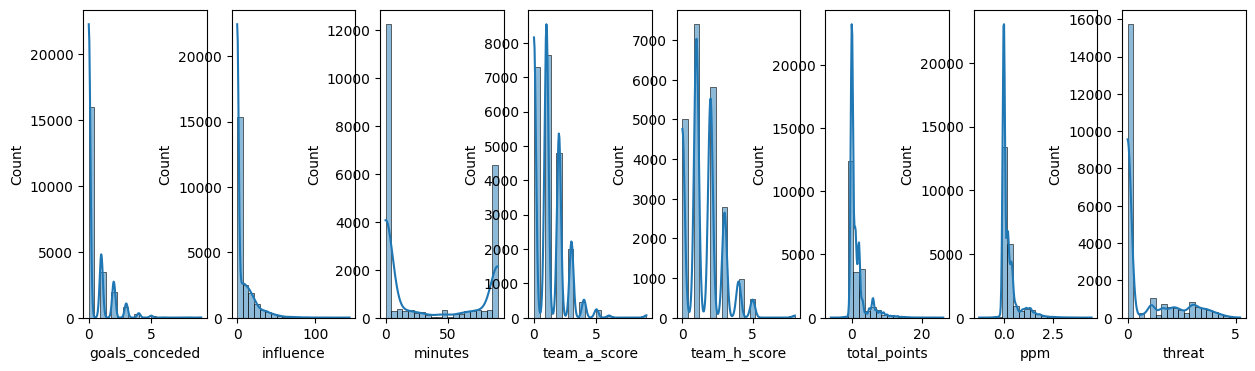

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(1, 8, figsize=(15, 4))

sns.histplot(ax=axes[0], data=df, x="goals_conceded", kde=True, bins=20);
sns.histplot(ax=axes[1], data=df, x="influence", kde=True, bins=20);
sns.histplot(ax=axes[2], data=df, x="minutes", kde=True, bins=20)
sns.histplot(ax=axes[3], data=df, x="team_a_score", kde=True, bins=20)
sns.histplot(ax=axes[4], data=df, x="team_h_score", kde=True, bins=20)
sns.histplot(ax=axes[5], data=df, x="total_points", kde=True, bins=20)
sns.histplot(ax=axes[6], data=df, x="ppm", kde=True, bins=20)
sns.histplot(ax=axes[7], data=df, x="threat", kde=True, bins=20)
plt.show()

<Axes: xlabel='threat'>

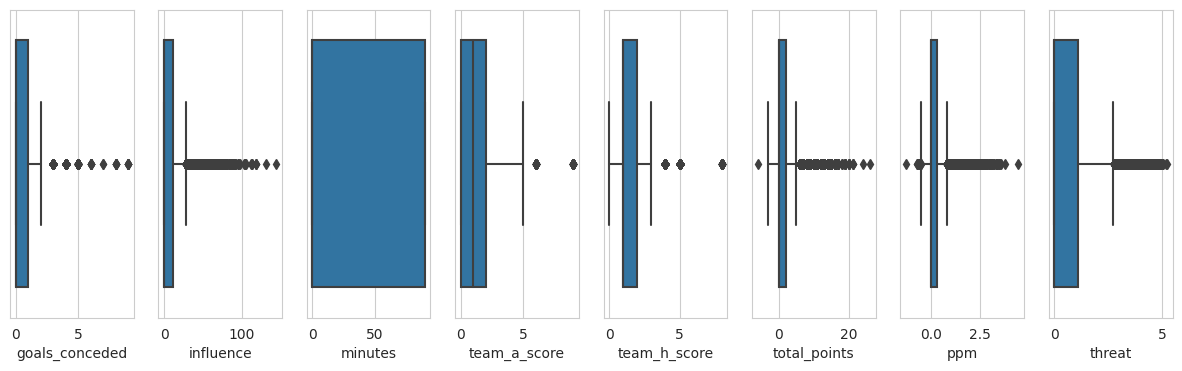

In [ ]:
sns.set_style('whitegrid')

fig, axes = plt.subplots(1, 8, figsize=(15, 4))

sns.boxplot(ax=axes[0], x = 'goals_conceded', data = df)
sns.boxplot(ax=axes[1], x = 'influence', data = df)
sns.boxplot(ax=axes[2], x = 'minutes', data = df)
sns.boxplot(ax=axes[3], x = 'team_a_score', data = df)
sns.boxplot(ax=axes[4], x = 'team_h_score', data = df)
sns.boxplot(ax=axes[5], x = 'total_points', data = df)
sns.boxplot(ax=axes[6], x = 'ppm', data = df)
sns.boxplot(ax=axes[7], x = 'threat', data = df)
#minutes 뺴고 이상값이 있음

In [ ]:
Q1 = df[['goals_conceded','influence', 'minutes','team_a_score','team_h_score','total_points', 'ppm', 'threat']].quantile(0.25)
Q3 = df[['goals_conceded','influence', 'minutes','team_a_score','team_h_score','total_points', 'ppm', 'threat']].quantile(0.75)
IQR = Q3 - Q1
print(IQR)

goals_conceded     1.000000
influence         11.200000
minutes           90.000000
team_a_score       2.000000
team_h_score       1.000000
total_points       2.000000
ppm                0.333333
threat             1.098612
dtype: float64


In [ ]:
Lower = Q1 - 3.0*IQR
Upper = Q3 + 3.0*IQR
print(Lower)

goals_conceded     -3.000000
influence         -33.600000
minutes          -270.000000
team_a_score       -6.000000
team_h_score       -2.000000
total_points       -6.000000
ppm                -1.000000
threat             -3.295837
dtype: float64


In [ ]:
print(Upper)

goals_conceded      4.000000
influence          44.800000
minutes           360.000000
team_a_score        8.000000
team_h_score        5.000000
total_points        8.000000
ppm                 1.333333
threat              4.394449
dtype: float64


In [ ]:
c1 = df['goals_conceded'] <= 4.0
c2 = df['influence'] <= 44.80
c3 = df['team_a_score']<=8.00
c4 = df['team_h_score'] <= 5.00
c5 = df['total_points'] <= 8.00
c6 = df['total_points'] >= -6.00
c7 = df['ppm'] <= 1.33
c8 = df['ppm'] >= -1.00
c9 = df['threat'] <= 2.97

df1 = df[c1 & c2 & c3 & c4 & c5 & c6 & c7 & c8 & c9]
df1.shape

(19097, 36)

In [ ]:
df1.columns

Index(['id', 'assists', 'bonus', 'bps', 'clean_sheets', 'creativity',
       'element', 'fixture', 'goals_conceded', 'goals_scored', 'ict_index',
       'influence', 'kickoff_time', 'minutes', 'opponent_team', 'own_goals',
       'penalties_missed', 'penalties_saved', 'red_cards', 'round', 'saves',
       'selected', 'team_a_score', 'team_h_score', 'threat', 'total_points',
       'transfers_balance', 'transfers_in', 'transfers_out', 'value',
       'was_home', 'yellow_cards', 'full', 'team', 'ppm', 'creativity_B'],
      dtype='object')

In [ ]:
# 상관계수 검토
cols = ['goals_conceded','influence', 'minutes','team_a_score','team_h_score','total_points', 'ppm', 'threat']
round(df1[cols].corr(), 2)

,goals_conceded,influence,minutes,team_a_score,team_h_score,total_points,ppm,threat
goals_conceded,1.00,0.58,0.71,0.12,0.14,0.28,0.29,0.39
influence,0.58,1.00,0.81,0.03,0.01,0.68,0.69,0.42
minutes,0.71,0.81,1.00,0.00,-0.00,0.73,0.74,0.57
team_a_score,0.12,0.03,0.00,1.00,-0.23,-0.04,-0.04,-0.01
team_h_score,0.14,0.01,-0.00,-0.23,1.00,-0.03,-0.04,-0.02
total_points,0.28,0.68,0.73,-0.04,-0.03,1.00,0.99,0.47
ppm,0.29,0.69,0.74,-0.04,-0.04,0.99,1.00,0.45
threat,0.39,0.42,0.57,-0.01,-0.02,0.47,0.45,1.00


In [ ]:
cols = ['goals_conceded','influence','team_a_score','team_h_score', 'ppm', 'threat']
round(df1[cols].corr(), 2)

,goals_conceded,influence,team_a_score,team_h_score,ppm,threat
goals_conceded,1.00,0.58,0.12,0.14,0.29,0.39
influence,0.58,1.00,0.03,0.01,0.69,0.42
team_a_score,0.12,0.03,1.00,-0.23,-0.04,-0.01
team_h_score,0.14,0.01,-0.23,1.00,-0.04,-0.02
ppm,0.29,0.69,-0.04,-0.04,1.00,0.45
threat,0.39,0.42,-0.01,-0.02,0.45,1.00


In [ ]:
from scipy import stats

data_1 = df1[df1['creativity_B'] == 1]['goals_conceded']
data_0 = df1[df1['creativity_B'] == 0]['goals_conceded']

stats.ttest_ind(data_1, data_0)   # 결과는 pvalue < 0.05

Ttest_indResult(statistic=82.85090848714425, pvalue=0.0)

In [ ]:
data_1 = df1[df1['creativity_B'] == 1]['influence']
data_0 = df1[df1['creativity_B'] == 0]['influence']

stats.ttest_ind(data_1, data_0)   # 결과는 pvalue < 0.05

Ttest_indResult(statistic=90.16317909950439, pvalue=0.0)

In [ ]:
data_1 = df1[df1['creativity_B'] == 1]['team_a_score']
data_0 = df1[df1['creativity_B'] == 0]['team_a_score']

stats.ttest_ind(data_1, data_0)   # 결과는 pvalue > 0.05

Ttest_indResult(statistic=-0.7401351911176779, pvalue=0.459227067091209)

In [ ]:
data_1 = df1[df1['creativity_B'] == 1]['team_h_score']
data_0 = df1[df1['creativity_B'] == 0]['team_h_score']

stats.ttest_ind(data_1, data_0)   # 결과는 pvalue > 0.05

Ttest_indResult(statistic=-0.9690765366095355, pvalue=0.33251927762632316)

In [ ]:
data_1 = df1[df1['creativity_B'] == 1]['ppm']
data_0 = df1[df1['creativity_B'] == 0]['ppm']

stats.ttest_ind(data_1, data_0)   # 결과는 pvalue < 0.05

Ttest_indResult(statistic=96.78077429581462, pvalue=0.0)

In [ ]:
data_1 = df1[df1['creativity_B'] == 1]['threat']
data_0 = df1[df1['creativity_B'] == 0]['threat']

stats.ttest_ind(data_1, data_0)   # 결과는 pvalue < 0.05

Ttest_indResult(statistic=114.7653668874975, pvalue=0.0)

In [ ]:
# 범주형 변수를 cols1에 저장
cols1 = ['opponent_team', 'was_home', 'team']
df1 = df[cols1]   # 범주형 변수만 모은 cols1로 구성된 데이터프레임 df1을 생성

# 데이터프레임 df1안의 컬럼명을 순차적으로 value_counts() 구문에 넣어서 결과 출력
for col in df1.columns:
    print ("")
    print ("---- %s ---" % col)
    print (df[col].value_counts(dropna=False, normalize=True))


---- opponent_team ---
Liverpool           0.050618
Sheffield United    0.050440
Brighton            0.050440
Wolves              0.050351
Man City            0.050173
Norwich             0.050084
Burnley             0.050040
Watford             0.050040
Tottenham           0.050040
Chelsea             0.050040
Everton             0.050040
Crystal Palace      0.049862
Bournemouth         0.049862
Southampton         0.049862
Leicester           0.049818
Aston Villa         0.049818
Arsenal             0.049773
Newcastle United    0.049640
West Ham            0.049551
Man Utd             0.049507
Name: opponent_team, dtype: float64

---- was_home ---
False    0.500356
True     0.499644
Name: was_home, dtype: float64

---- team ---
Southampton         0.055951
West Ham            0.055462
Newcastle United    0.055462
Man Utd             0.055106
Arsenal             0.054751
Tottenham           0.054662
Bournemouth         0.052173
Brighton            0.051195
Watford             0.05004

In [ ]:
from sklearn.preprocessing import OrdinalEncoder   # OrdinalEncoder를 import
df['was_home_encoded'] = OrdinalEncoder().fit_transform(df['was_home'].values.reshape(-1,1))
df.groupby(['was_home', 'was_home_encoded']).size()   # 변경전후 변수값 비교표 디스플레이

was_home  was_home_encoded
False     0.0                 11259
True      1.0                 11243
dtype: int64

In [ ]:
from sklearn.preprocessing import OrdinalEncoder   # OrdinalEncoder를 import
df['opponent_team_encoded'] = OrdinalEncoder().fit_transform(df['opponent_team'].values.reshape(-1,1))
df.groupby(['opponent_team', 'opponent_team_encoded']).size()   # 변경전후 변수값 비교표 디스플레이

opponent_team     opponent_team_encoded
Arsenal           0.0                      1120
Aston Villa       1.0                      1121
Bournemouth       2.0                      1122
Brighton          3.0                      1135
Burnley           4.0                      1126
Chelsea           5.0                      1126
Crystal Palace    6.0                      1122
Everton           7.0                      1126
Leicester         8.0                      1121
Liverpool         9.0                      1139
Man City          10.0                     1129
Man Utd           11.0                     1114
Newcastle United  12.0                     1117
Norwich           13.0                     1127
Sheffield United  14.0                     1135
Southampton       15.0                     1122
Tottenham         16.0                     1126
Watford           17.0                     1126
West Ham          18.0                     1115
Wolves            19.0                     1133


In [ ]:
from sklearn.preprocessing import OrdinalEncoder   # OrdinalEncoder를 import
df['team_encoded'] = OrdinalEncoder().fit_transform(df['team'].values.reshape(-1,1))
df.groupby(['team', 'team_encoded']).size()   # 변경전후 변수값 비교표 디스플레이

team              team_encoded
Arsenal           0.0             1232
Aston Villa       1.0             1107
Bournemouth       2.0             1174
Brighton          3.0             1152
Burnley           4.0             1015
Chelsea           5.0             1083
Crystal Palace    6.0             1041
Everton           7.0             1102
Leicester         8.0             1029
Liverpool         9.0             1072
Man City          10.0             958
Man Utd           11.0            1240
Newcastle United  12.0            1248
Norwich           13.0            1095
Sheffield United  14.0            1054
Southampton       15.0            1259
Tottenham         16.0            1230
Watford           17.0            1126
West Ham          18.0            1248
Wolves            19.0            1037
dtype: int64

In [ ]:
df.columns

Index(['id', 'assists', 'bonus', 'bps', 'clean_sheets', 'creativity',
       'element', 'fixture', 'goals_conceded', 'goals_scored', 'ict_index',
       'influence', 'kickoff_time', 'minutes', 'opponent_team', 'own_goals',
       'penalties_missed', 'penalties_saved', 'red_cards', 'round', 'saves',
       'selected', 'team_a_score', 'team_h_score', 'threat', 'total_points',
       'transfers_balance', 'transfers_in', 'transfers_out', 'value',
       'was_home', 'yellow_cards', 'full', 'team', 'ppm', 'creativity_B',
       'was_home_encoded', 'opponent_team_encoded', 'team_encoded'],
      dtype='object')

In [ ]:
# 범주형 변수 제거
df.drop(['opponent_team','team','was_home'],
        axis=1, inplace=True)
# 구간 변수 제거
df.drop(['assists','bonus','goals_scored','penalties_saved','saves',],
        axis=1, inplace=True)
# 분석에서 제외할 변수 제거
df.drop(['bps','element','fixture','ict_index','round','selected','transfers_balance',
         'transfers_in', 'transfers_out','value', 'kickoff_time'],
        axis=1, inplace=True)
df.drop(['id','full'], axis=1, inplace=True)

In [ ]:
df.to_csv('/content/drive/MyDrive/Colab Notebooks/project/players_1920_fin_DataCleaning.csv')

In [ ]:
df.drop(['creativity'], axis=1, inplace=True) # 기존 연속형 타겟 변수 제거(이진값 타겟 변수로 분석하기 때문)
df.columns

Index(['clean_sheets', 'goals_conceded', 'influence', 'minutes', 'own_goals',
       'penalties_missed', 'red_cards', 'team_a_score', 'team_h_score',
       'threat', 'total_points', 'yellow_cards', 'ppm', 'creativity_B',
       'was_home_encoded', 'opponent_team_encoded', 'team_encoded'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22502 entries, 0 to 22501
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   clean_sheets           22502 non-null  int64  
 1   creativity             22502 non-null  float64
 2   goals_conceded         22502 non-null  int64  
 3   influence              22502 non-null  float64
 4   minutes                22502 non-null  int64  
 5   own_goals              22502 non-null  int64  
 6   penalties_missed       22502 non-null  int64  
 7   red_cards              22502 non-null  int64  
 8   team_a_score           22502 non-null  int64  
 9   team_h_score           22502 non-null  int64  
 10  threat                 22502 non-null  float64
 11  total_points           22502 non-null  int64  
 12  yellow_cards           22502 non-null  int64  
 13  ppm                    22502 non-null  float64
 14  creativity_B           22502 non-null  float64
 15  wa

In [ ]:
cols1 = ['clean_sheets','opponent_team_encoded', 'own_goals', 'penalties_missed','red_cards','was_home_encoded', 'yellow_cards', 'team_encoded']
df[cols1].describe()

,clean_sheets,opponent_team_encoded,own_goals,penalties_missed,red_cards,was_home_encoded,yellow_cards,team_encoded
count,22502.000000,22502.000000,22502.000000,22502.000000,22502.000000,22502.000000,22502.000000,22502.000000
mean,0.104302,9.501867,0.001467,0.000889,0.002000,0.499644,0.056839,9.567461
std,0.305658,5.764952,0.038268,0.029800,0.044676,0.500011,0.231541,5.824596
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000
50%,0.000000,9.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10.000000
75%,0.000000,14.000000,0.000000,0.000000,0.000000,1.000000,0.000000,15.000000
max,1.000000,19.000000,1.000000,1.000000,1.000000,1.000000,1.000000,19.000000


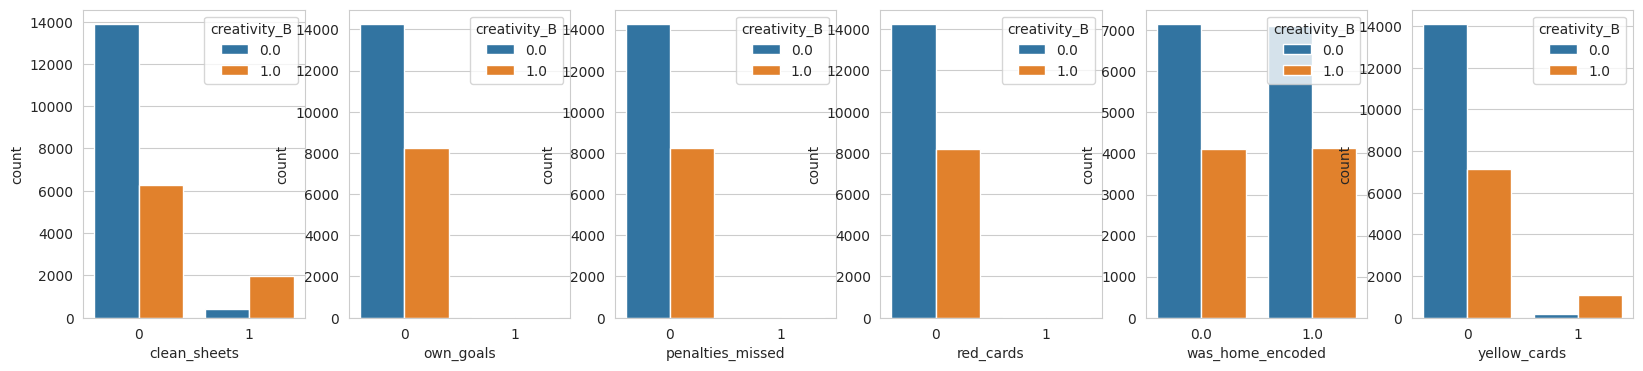

In [ ]:
# 참조 코딩
fig, axes = plt.subplots(1, 6, figsize=(20, 4))

sns.countplot(ax=axes[0], x='clean_sheets', hue='creativity_B', data=df);
sns.countplot(ax=axes[1], x='own_goals', hue='creativity_B', data=df);
sns.countplot(ax=axes[2], x='penalties_missed', hue='creativity_B', data=df);
sns.countplot(ax=axes[3], x='red_cards', hue='creativity_B', data=df);
sns.countplot(ax=axes[4], x='was_home_encoded', hue='creativity_B', data=df);
sns.countplot(ax=axes[5], x='yellow_cards', hue='creativity_B', data=df);

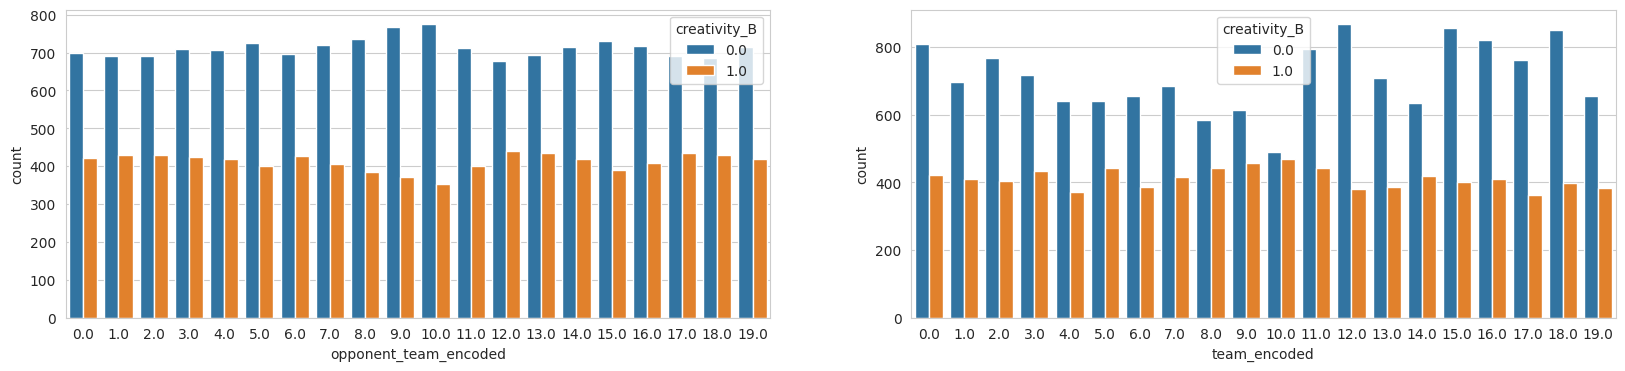

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(20, 4))
sns.countplot(ax=axes[0], x='opponent_team_encoded', hue='creativity_B', data=df);
sns.countplot(ax=axes[1], x='team_encoded', hue='creativity_B', data=df);

In [ ]:
#----- 중간 보고서 이후
df['creativity_B'].value_counts(dropna=False, normalize = True)

0.0    0.633677
1.0    0.366323
Name: creativity_B, dtype: float64

In [ ]:
!pip install graphviz

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import graphviz

In [ ]:
# target과 data로 분리하여 저장
data = df.drop(['creativity_B'], axis=1)   # 타겟변수를 제외한 변수만 data에 저장
target = df['creativity_B']                # 타겟변수만 target에 저장
data.shape

(22502, 17)

In [ ]:
target.shape

(22502,)

In [ ]:
# 데이터 분할
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    data, target, test_size=0.5, random_state=42, stratify = target)

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)

X_train shape: (11251, 17)
X_test shape: (11251, 17)


In [ ]:
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

y_train shape: (11251,)
y_test shape: (11251,)


In [ ]:
y_train.value_counts(normalize=True)

0.0    0.633633
1.0    0.366367
Name: creativity_B, dtype: float64

In [ ]:
# 결정 트리 분류 모델
# Decision Tree 모델 (Default인 GINI기준이자 Maximal depth 조건)
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
tree = DecisionTreeClassifier(random_state=0)   # Classifier로 DecisionTreeClassifer 지정
model = tree.fit(X_train, y_train)   # Clssifier를 트레이닝 데이터셋에서 학습시킴
pred = model.predict(X_test)  # 학습된 Classifier로 테스트 데이터셋 자료이용해서 타겟변수 예측값 생성

print("Accuracy(GINI) on training set:{:.5f}".format(model.score(X_train, y_train)))
print("Accuracy(GINI) on test set:{:.5f}".format(accuracy_score(y_test, pred)))

Accuracy(GINI) on training set:1.00000
Accuracy(GINI) on test set:1.00000


In [ ]:
# Decision Tree 모델 (Gini 기준)
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

tree = DecisionTreeClassifier(criterion="gini", random_state=0, max_depth=5)

params = {'criterion':['gini','entropy'],'max_depth': range(1,21)}

grid_tree = GridSearchCV(tree, param_grid=params, scoring='accuracy', cv=5, n_jobs=-1,
                     verbose=1)
grid_tree.fit(X_train, y_train)

print("GridSearchCV max accuracy:{:.5f}".format(grid_tree.best_score_))
print("GridSearchCV best parameter:", (grid_tree.best_params_))

Fitting 5 folds for each of 40 candidates, totalling 200 fits
GridSearchCV max accuracy:1.00000
GridSearchCV best parameter: {'criterion': 'gini', 'max_depth': 1}


In [ ]:
best_clf = grid_tree.best_estimator_
pred = best_clf.predict(X_test)
print("Accuracy on test set:{:.5f}".format(accuracy_score(y_test, pred)))

Accuracy on test set:1.00000


In [ ]:
# 더미 변수 생성
cols2 = ['opponent_team_encoded', 'team_encoded']
df2 = pd.get_dummies(df, columns=cols2)
df2.head(3)

,clean_sheets,creativity,goals_conceded,influence,minutes,own_goals,penalties_missed,red_cards,team_a_score,team_h_score,...,team_encoded_10.0,team_encoded_11.0,team_encoded_12.0,team_encoded_13.0,team_encoded_14.0,team_encoded_15.0,team_encoded_16.0,team_encoded_17.0,team_encoded_18.0,team_encoded_19.0
0,0,0.1,1,0.2,24,0,0,0,0,4,...,0,0,0,0,0,0,0,0,0,0
1,0,0.3,1,1.0,6,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
2,0,4.8,0,2.0,20,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
df2.shape

(22502, 56)

In [ ]:
# 기준 더미 변수 제거
# 꼴지 팀인 Sheffield United(#14) 제거
cols3 = ['opponent_team_encoded_14.0','team_encoded_14.0']

df2.drop(cols3, axis=1, inplace=True)   # cols2에 저장된 15개 더미 변수명을 데이터프레임에서 제거
df2.shape

(22502, 54)

In [ ]:
df2.dtypes

clean_sheets                    int64
creativity                    float64
goals_conceded                  int64
influence                     float64
minutes                         int64
own_goals                       int64
penalties_missed                int64
red_cards                       int64
team_a_score                    int64
team_h_score                    int64
threat                        float64
total_points                    int64
yellow_cards                    int64
ppm                           float64
creativity_B                  float64
was_home_encoded              float64
opponent_team_encoded_0.0       uint8
opponent_team_encoded_1.0       uint8
opponent_team_encoded_2.0       uint8
opponent_team_encoded_3.0       uint8
opponent_team_encoded_4.0       uint8
opponent_team_encoded_5.0       uint8
opponent_team_encoded_6.0       uint8
opponent_team_encoded_7.0       uint8
opponent_team_encoded_8.0       uint8
opponent_team_encoded_9.0       uint8
opponent_tea

In [ ]:
# 더미변수로 생성된 데이터로 로지스틱 회귀 분석
data = df2
data = df2.drop(['creativity_B'], axis=1)

# 50:50 데이터 분할
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    data, target, test_size=0.5, random_state=42, stratify=target)

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)


X_train shape: (11251, 52)
X_test shape: (11251, 52)


In [ ]:
# Logistic Regression 모형 (Default 모델)
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
lr = LogisticRegression(solver='lbfgs',penalty='none',random_state=0,n_jobs=-1)
model = lr.fit(X_train, y_train)
pred = model.predict(X_test)

print ("Logreg Training set score:{:.5f}".format(model.score(X_train, y_train)))
print ("Logreg Test set score:{:.5f}".format(accuracy_score(y_test, pred)))

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(


Logreg Training set score:0.88668
Logreg Test set score:0.88943


In [ ]:
# Logistic Regression 모형 (Default 모델)
lr = LogisticRegression(solver='lbfgs',penalty='none',random_state=0,n_jobs=-1)

# 그리드 서치
from sklearn.model_selection import GridSearchCV
params = {'solver':['lbfgs', 'saga'], 'penalty':['none']}

grid_lr = GridSearchCV(lr, param_grid=params, scoring='accuracy', cv=5, n_jobs=-1,)
grid_lr.fit(X_train, y_train)

print("GridSearchCV max accuracy:{:.5f}".format(grid_lr.best_score_))
print("GridSearchCV best parameter:", (grid_lr.best_params_))

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(


GridSearchCV max accuracy:0.88632
GridSearchCV best parameter: {'penalty': 'none', 'solver': 'saga'}


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [ ]:
best_clf = grid_lr.best_estimator_
pred = best_clf.predict(X_test)
print("Accuracy on test set:{:.5f}".format(accuracy_score(y_test, pred)))

Accuracy on test set:0.88952


In [ ]:
# 구간 변수들만 별도로 모아 데이터프레임 df_num을 만든다.
numeric_cols = ['goals_conceded','influence','team_a_score','team_h_score', 'ppm', 'threat']
df_num = df[numeric_cols]

# StandardScaler( )로 데이터 스케일 표준화를 실행하고 결과를 데이터프레임으로 만든다.
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_num_standard = pd.DataFrame(scaler.fit_transform(df_num))

# StandardScaler( )는 변수명을 지우므로, 새로 만든 데이터프레임에 다시 변수명을 넣는다.
df_num_standard.columns = df_num.columns
df_num_standard.head()

,goals_conceded,influence,team_a_score,team_h_score,ppm,threat
0,0.517554,-0.558548,-1.007884,1.996286,-0.061632,-0.587593
1,0.517554,-0.496453,-0.167564,-0.412574,-0.061632,1.850444
2,-0.528995,-0.418835,-1.007884,-1.215528,-0.061632,1.734811
3,0.517554,-0.558548,-1.007884,0.390379,-0.061632,-0.587593
4,-0.528995,4.874707,-1.007884,1.193333,5.918926,3.105403


In [ ]:
df_cat = df2.drop(numeric_cols, axis=1) # 원래 데이터프레임 df에서 구간변수들을 제거하여 df_cat에 저장

In [ ]:
# 구간변수 스케일을 표준화한 df_num_standard와 범주형 변수만 담은 df_cat을 병합
dfu_standard = pd.concat([df_num_standard, df_cat], axis=1)
dfu_standard.columns   # dfu의 변수명을 나열

Index(['goals_conceded', 'influence', 'team_a_score', 'team_h_score', 'ppm',
       'threat', 'clean_sheets', 'minutes', 'own_goals', 'penalties_missed',
       'red_cards', 'total_points', 'yellow_cards', 'creativity_B',
       'was_home_encoded', 'opponent_team_encoded_0.0',
       'opponent_team_encoded_1.0', 'opponent_team_encoded_2.0',
       'opponent_team_encoded_3.0', 'opponent_team_encoded_4.0',
       'opponent_team_encoded_5.0', 'opponent_team_encoded_6.0',
       'opponent_team_encoded_7.0', 'opponent_team_encoded_8.0',
       'opponent_team_encoded_9.0', 'opponent_team_encoded_10.0',
       'opponent_team_encoded_11.0', 'opponent_team_encoded_12.0',
       'opponent_team_encoded_13.0', 'opponent_team_encoded_15.0',
       'opponent_team_encoded_16.0', 'opponent_team_encoded_17.0',
       'opponent_team_encoded_18.0', 'opponent_team_encoded_19.0',
       'team_encoded_0.0', 'team_encoded_1.0', 'team_encoded_2.0',
       'team_encoded_3.0', 'team_encoded_4.0', 'team_encoded_

In [ ]:
data = dfu_standard.drop(['creativity_B'], axis=1)   # 타겟변수를 제외한 변수만 data에 저장
target = dfu_standard['creativity_B']                # 타겟변수만 target에 저장

# 50:50 데이터 분할
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    data, target, test_size=0.5, random_state=42, stratify=target)

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)

X_train shape: (11251, 52)
X_test shape: (11251, 52)


In [ ]:
# Logistic Regression 모형 (Default 모델)
lr = LogisticRegression(solver='lbfgs',penalty='none',random_state=0,n_jobs=-1)

# 그리드 서치 실행
from sklearn.model_selection import GridSearchCV
params = {'solver':['lbfgs', 'saga'], 'penalty':['none']}

grid_lr = GridSearchCV(lr, param_grid=params, scoring='accuracy', cv=5, n_jobs=-1,)
grid_lr.fit(X_train, y_train)

print("GridSearchCV max accuracy:{:.5f}".format(grid_lr.best_score_))
print("GridSearchCV best parameter:", (grid_lr.best_params_))

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(


GridSearchCV max accuracy:0.88348
GridSearchCV best parameter: {'penalty': 'none', 'solver': 'lbfgs'}


In [ ]:
best_clf = grid_lr.best_estimator_
pred = best_clf.predict(X_test)
print("Accuracy on test set:{:.5f}".format(accuracy_score(y_test, pred)))

Accuracy on test set:0.88792


In [ ]:
# 오즈비 해석

# 변수명을 Index로 만들고 coefficient값을 매칭한 데이터프레임 만들기

feature_names = list(data.columns)   # 변수명(컬럼명)을 리스트 형태로 만들기
dft = pd.DataFrame(np.round(best_clf.coef_, 3).transpose(), index=feature_names,
                   columns=['coef'])
dft1 = dft.sort_values(by='coef', ascending=True)   # 컬럼 coef의 값들을 오름차순으로 정리
dft1

,coef
clean_sheets,-0.800
influence,-0.769
team_encoded_17.0,-0.677
team_encoded_19.0,-0.519
team_encoded_4.0,-0.518
opponent_team_encoded_10.0,-0.482
ppm,-0.476
opponent_team_encoded_11.0,-0.335
team_encoded_18.0,-0.331
opponent_team_encoded_15.0,-0.327


In [ ]:
# 변수명을 Index로 만들고 coefficient값을 제곱한 Odds ratio값을 Index에 매칭한 데이터프레임 만들기

feature_names = list(data.columns)   # 변수명(컬럼명)을 리스트 형태로 만들기
dft = pd.DataFrame(np.round(np.exp(best_clf.coef_),3).transpose(), index=feature_names,
                   columns=['Odds_ratio'])
dft1 = dft.sort_values(by='Odds_ratio', ascending=False)   # 컬럼 coef의 값들을 내림차순으로 정리
dft1

,Odds_ratio
threat,4.749
yellow_cards,4.627
total_points,1.618
team_encoded_9.0,1.426
team_encoded_10.0,1.289
red_cards,1.190
team_encoded_0.0,1.160
goals_conceded,1.152
opponent_team_encoded_12.0,1.123
opponent_team_encoded_18.0,1.121


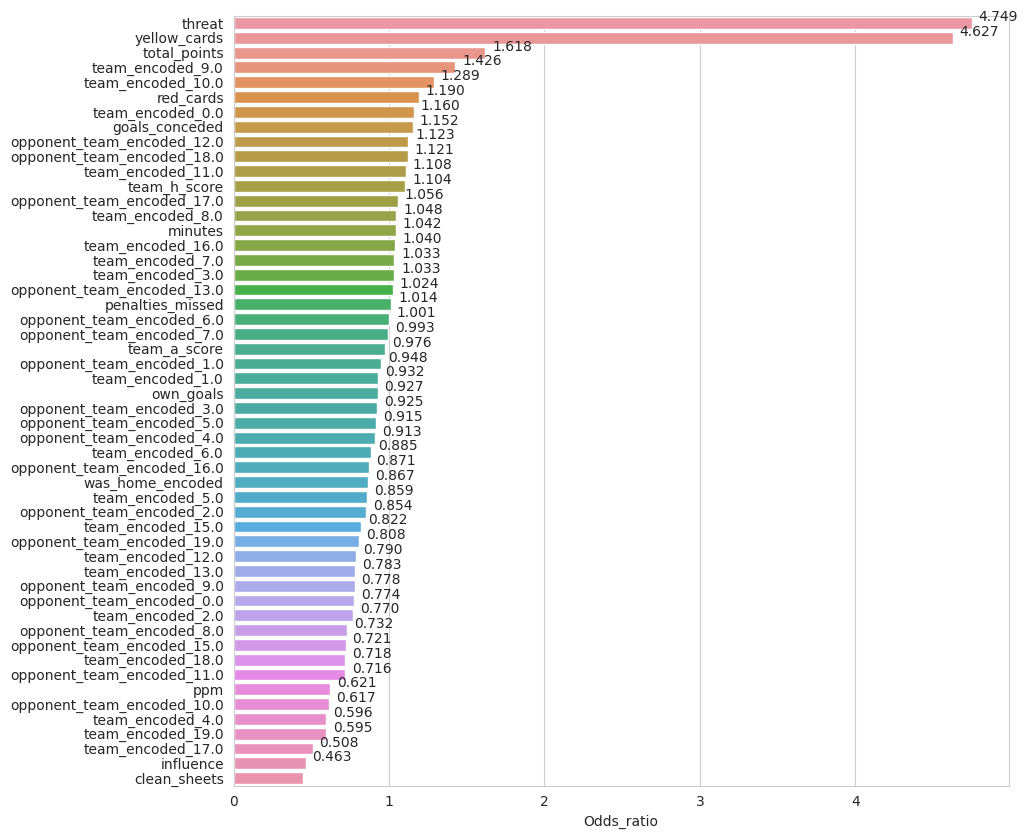

In [ ]:
# 데이터프레임 dft1의 막대그래프(barplot) 그리기
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.figure(figsize=(10, 10))  # 가로 크기 10, 세로 크기 6

ax = sns.barplot(y=dft1.index, x="Odds_ratio", data=dft1)

for p in ax.patches:
    ax.annotate("%.3f" % p.get_width(), (p.get_x() + p.get_width(), p.get_y()+1.2),
                xytext=(5, 10), textcoords='offset points')

In [ ]:
X_train.shape

(11251, 52)

In [ ]:
# 제거할 비율 설정
remove_ratio = 0.4  # 제거할 비율 (예: 20%)

# 무작위로 샘플 선택하여 제거
remove_indices = np.random.choice(df.index, size=int(len(df) * remove_ratio), replace=False)
data= dfu_standard.drop(remove_indices)
target = dfu_standard['creativity_B'].drop(remove_indices)

data = data.drop(['creativity_B'], axis=1)

# 50:50 데이터 분할
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    data, target, test_size=0.5, random_state=42, stratify=target)

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)


X_train shape: (6751, 52)
X_test shape: (6751, 52)


In [ ]:
data.drop(['creativity_B'], axis=1)

,goals_conceded,influence,team_a_score,team_h_score,ppm,threat,clean_sheets,minutes,own_goals,penalties_missed,...,team_encoded_9.0,team_encoded_10.0,team_encoded_11.0,team_encoded_12.0,team_encoded_13.0,team_encoded_15.0,team_encoded_16.0,team_encoded_17.0,team_encoded_18.0,team_encoded_19.0
1,0.517554,-0.496453,-0.167564,-0.412574,-0.061632,1.850444,0,6,0,0,...,0,0,0,0,0,0,0,0,0,0
2,-0.528995,-0.418835,-1.007884,-1.215528,-0.061632,1.734811,0,20,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0.517554,-0.558548,-1.007884,0.390379,-0.061632,-0.587593,0,25,0,0,...,0,0,0,0,0,0,0,0,0,0
11,0.517554,-0.092840,0.672757,-0.412574,0.394332,2.040659,0,75,0,0,...,0,0,0,0,0,0,0,0,0,0
12,-0.528995,-0.574071,0.672757,0.390379,-0.560012,-0.587593,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22489,-0.528995,-0.574071,1.513077,0.390379,-0.560012,-0.587593,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
22493,1.564102,0.621245,0.672757,-0.412574,0.483108,-0.587593,0,90,0,0,...,0,0,0,0,0,0,0,0,0,0
22495,0.517554,-0.030746,-0.167564,-1.215528,0.483108,-0.587593,0,90,0,0,...,0,0,0,0,0,0,0,0,0,0
22496,-0.528995,-0.574071,-1.007884,0.390379,-0.560012,-0.587593,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
data.columns

Index(['goals_conceded', 'influence', 'team_a_score', 'team_h_score', 'ppm',
       'threat', 'clean_sheets', 'minutes', 'own_goals', 'penalties_missed',
       'red_cards', 'total_points', 'yellow_cards', 'was_home_encoded',
       'opponent_team_encoded_0.0', 'opponent_team_encoded_1.0',
       'opponent_team_encoded_2.0', 'opponent_team_encoded_3.0',
       'opponent_team_encoded_4.0', 'opponent_team_encoded_5.0',
       'opponent_team_encoded_6.0', 'opponent_team_encoded_7.0',
       'opponent_team_encoded_8.0', 'opponent_team_encoded_9.0',
       'opponent_team_encoded_10.0', 'opponent_team_encoded_11.0',
       'opponent_team_encoded_12.0', 'opponent_team_encoded_13.0',
       'opponent_team_encoded_15.0', 'opponent_team_encoded_16.0',
       'opponent_team_encoded_17.0', 'opponent_team_encoded_18.0',
       'opponent_team_encoded_19.0', 'team_encoded_0.0', 'team_encoded_1.0',
       'team_encoded_2.0', 'team_encoded_3.0', 'team_encoded_4.0',
       'team_encoded_5.0', 'team_enco

In [ ]:
# 사이킷런 신경망 분류 모델
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
clf_mlp = MLPClassifier(max_iter = 2000, random_state = 0)
                       # convergence warinng을 회피하기 위해 max_iter = 2000으로 올려서 설정
clf_mlp.fit(X_train, y_train)
pred = clf_mlp.predict(X_test)  # 학습된 Classifier로 테스트 데이터셋 자료이용해서 타겟변수 예측값 생성
accuracy = accuracy_score(y_test, pred)

print ("Neural Network Training set score:{:.5f}".format(clf_mlp.score(X_train, y_train)))
print ("Neural Network Test set score:{:.5f}".format(accuracy_score(y_test, pred)))

Neural Network Training set score:0.94676
Neural Network Test set score:0.90445


In [ ]:
# 신경망 기본 모델 (with adam solver)
clf_mlp = MLPClassifier(max_iter = 2000, random_state = 0)

# 그리드 서치 재실행
from sklearn.model_selection import GridSearchCV
params = {'solver':['sgd','adam'],
          'alpha':[0.01, 1],
          'activation':['tanh','relu']
         }

grid_mlp = GridSearchCV(clf_mlp, param_grid=params, scoring='accuracy', cv=5, n_jobs=-1)
grid_mlp.fit(X_train, y_train)

print("GridSearchCV max accuracy:{:.5f}".format(grid_mlp.best_score_))
print("GridSearchCV best parameter:", (grid_mlp.best_params_))

GridSearchCV max accuracy:0.90831
GridSearchCV best parameter: {'activation': 'tanh', 'alpha': 0.01, 'solver': 'adam'}


In [ ]:
# target과 data로 분리하여 저장
data = df.drop(['creativity_B'], axis=1)   # 타겟변수를 제외한 변수만 data에 저장
target = df['creativity_B']                # 타겟변수만 target에 저장
data.shape

(22502, 16)

In [ ]:
# 50:50 데이터 분할
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    data, target, test_size=0.5, random_state=42)   # test_size=0.5임에 주의

In [ ]:
# Random Forest 모델 (Default 모델, tree depth 제한 없음)
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
rf = RandomForestClassifier(n_estimators = 100, random_state=0)
model = rf.fit(X_train, y_train)
pred = model.predict(X_test)  # 학습된 Classifier로 테스트 데이터셋 자료이용해서 타겟변수 예측값 생성
#accuracy = accuracy_score(y_test, pred)

print ("Random Forest Accuracy on training set:{:.5f}".format(model.score(X_train, y_train)))
print ("Random Forest Accuracy on test set:{:.5f}".format(accuracy_score(y_test, pred)))

Random Forest Accuracy on training set:1.00000
Random Forest Accuracy on test set:0.91654


In [ ]:
# Random Forest 모델 (Default 모델, tree depth 제한 없음)
rf = RandomForestClassifier(n_estimators = 100, random_state=0)

# 그리드 서치 실행
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold

# StratifiedKFold의 random_state 옵션값을 특정 숫자(예: 0)로 고정
cross_validation = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)
params = {'max_depth': range(10, 41), 'n_estimators': [100, 200]}

# GridSearchCV의 cv=cross_validation 옵션값은 위의 StratifiedKFold의 random_state 옵션값을 적용시켜서
# GridSearchCV를 실행핼 때마다 결과가 항상 동일하게 나오도록 보장
grid_rf = GridSearchCV(rf, param_grid=params, scoring='accuracy', cv=cross_validation,
                       verbose=1, n_jobs=-1)
grid_rf.fit(X_train, y_train)

print("GridSearchCV max accuracy:{:.5f}".format(grid_rf.best_score_))
print("GridSearchCV best parameter:", (grid_rf.best_params_))

Fitting 5 folds for each of 62 candidates, totalling 310 fits
GridSearchCV max accuracy:0.91921
GridSearchCV best parameter: {'max_depth': 12, 'n_estimators': 200}


In [ ]:
best_clf = grid_rf.best_estimator_
pred = best_clf.predict(X_test)
print("Accuracy on test set:{:.5f}".format(accuracy_score(y_test, pred)))

from sklearn.metrics import roc_auc_score
ROC_AUC = roc_auc_score(y_test,best_clf.predict_proba(X_test)[:, 1])
print("ROC AUC on test set:{:.5f}".format(ROC_AUC))

Accuracy on test set:0.91894
ROC AUC on test set:0.97693


In [ ]:
#---- 연속 타겟 변수에 적용----

In [ ]:
ch6_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/project/players_1920_fin_DataCleaning.csv')

In [ ]:
# 연속형 타겟변수를 다루기 위해 이진값 타겟 변수(creativity_B) 삭제
ch6_df.drop(['creativity_B'], axis=1, inplace=True)

# 엑셀에 'Unnamed: 0' 항목 삭제
ch6_df.drop(['Unnamed: 0'], axis=1, inplace=True)

In [ ]:
ch6_df.columns

Index(['clean_sheets', 'creativity', 'goals_conceded', 'influence', 'minutes',
       'own_goals', 'penalties_missed', 'red_cards', 'team_a_score',
       'team_h_score', 'threat', 'total_points', 'yellow_cards', 'ppm',
       'was_home_encoded', 'opponent_team_encoded', 'team_encoded'],
      dtype='object')

In [ ]:
# 구간 변수들만 별도로 모아 데이터프레임 df_num을 만든다.
numeric_cols = ['goals_conceded','influence','team_a_score','team_h_score', 'ppm', 'threat']
df_num = ch6_df[numeric_cols]

# StandardScaler( )로 데이터 스케일 표준화를 실행하고 결과를 데이터프레임으로 만든다.
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_num_standard = pd.DataFrame(scaler.fit_transform(df_num))

# StandardScaler( )는 변수명을 지우므로, 새로 만든 데이터프레임에 다시 변수명을 넣는다.
df_num_standard.columns = df_num.columns
df_num_standard.head()

,goals_conceded,influence,team_a_score,team_h_score,ppm,threat
0,0.517554,-0.558548,-1.007884,1.996286,-0.061632,-0.587593
1,0.517554,-0.496453,-0.167564,-0.412574,-0.061632,1.850444
2,-0.528995,-0.418835,-1.007884,-1.215528,-0.061632,1.734811
3,0.517554,-0.558548,-1.007884,0.390379,-0.061632,-0.587593
4,-0.528995,4.874707,-1.007884,1.193333,5.918926,3.105403


In [ ]:
df_cat = ch6_df.drop(numeric_cols, axis=1) # 원래 데이터프레임 df에서 구간변수들을 제거하여 df_cat에 저장

In [ ]:
# 구간변수 스케일을 표준화한 df_num_standard와 범주형 변수만 담은 df_cat을 병합
dfu_standard = pd.concat([df_num_standard, df_cat], axis=1)
dfu_standard.columns   # dfu의 변수명을 나열

Index(['goals_conceded', 'influence', 'team_a_score', 'team_h_score', 'ppm',
       'threat', 'clean_sheets', 'creativity', 'minutes', 'own_goals',
       'penalties_missed', 'red_cards', 'total_points', 'yellow_cards',
       'was_home_encoded', 'opponent_team_encoded', 'team_encoded'],
      dtype='object')

In [ ]:
data = dfu_standard.drop(['creativity'], axis=1)
target = dfu_standard['creativity']                # 타겟변수만 target에 저장

# 50:50 data partition.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    data, target, test_size=0.5, random_state=42)   # test_size=0.5임에 주의

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)

X_train shape: (11251, 16)
X_test shape: (11251, 16)


In [ ]:
# 연속변수 타겟변수일 때 Linear Regression 모델 (Default 모델)
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

linr = LinearRegression(n_jobs=-1)
model = linr.fit(X_train, y_train)
pred = model.predict(X_test)

print ("Linear Regression Training set r2 score:{:.5f}".format(model.score(X_train, y_train)))
print ("Linear Regression Test set r2 score:{:.5f}".format(r2_score(y_test, pred)))

Linear Regression Training set r2 score:0.39360
Linear Regression Test set r2 score:0.38763


In [ ]:
# 연속변수 타겟변수일 때 Ridge 모델 (Default 모델)
from sklearn.linear_model import Ridge
Ridge = Ridge()
model = Ridge.fit(X_train, y_train)
pred = model.predict(X_test)  # 학습된 Classifier로 테스트 데이터셋 자료이용해서 타겟변수 예측값 생성

print ("Linear Regression Training set score:{:.5f}".format(model.score(X_train, y_train)))
print ("Linear Regression Test set score:{:.5f}".format(r2_score(y_test, pred)))

Linear Regression Training set score:0.39360
Linear Regression Test set score:0.38765


In [ ]:
# 연속변수 타겟변수일 때 Ridge 모델 (Default 모델)
from sklearn.linear_model import Ridge
Ridge = Ridge()

In [ ]:
# 그리드 서치 실행
from sklearn.model_selection import GridSearchCV

params = {'alpha':[0.001, 0.01, 0.1, 1, 10, 100, 1000],\
         'solver':['auto', 'svd', 'lsqr', 'cholesky','sparse_cg','sag','saga','lbfgs']}

grid_Ridge = GridSearchCV(Ridge, param_grid=params, scoring='r2', cv=5, n_jobs=-1, verbose=1)
grid_Ridge.fit(X_train, y_train)

print("GridSearchCV max score:{:.5f}".format(grid_Ridge.best_score_))
print("GridSearchCV best parameter:", (grid_Ridge.best_params_))

Fitting 5 folds for each of 56 candidates, totalling 280 fits
GridSearchCV max score:0.38855
GridSearchCV best parameter: {'alpha': 10, 'solver': 'svd'}


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
35 fits failed out of a total of 280.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
35 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py", line 1134, in fit
    return super().fit(X, y, sample_weight=sample_weight)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py", line 825, in fit
    raise ValueError(
ValueError: 'lbfgs' solver can be used

In [ ]:
best_clf = grid_Ridge.best_estimator_
pred = best_clf.predict(X_test)

print("R2 Score on test set:{:.5f}".format(best_clf.score(X_test, y_test)))

R2 Score on test set:0.38771


In [ ]:
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

# 기본 XGBRegressor 모델
from sklearn.metrics import r2_score

xgb = XGBRegressor(random_state=0)
xgb.fit(X_train, y_train)
pred = xgb.predict(X_test)

print('r2: {0:.5f}'.format(r2_score(y_test, pred)))

r2: 0.43840


In [ ]:
# 그리드 서치 실행
from sklearn.model_selection import GridSearchCV

xgb = XGBRegressor()

parameters = {'colsample_bytree': [0.7],
              'learning_rate': [0.05],
              'max_depth': [16],
              'min_child_weight' : [4],
              'n_estimators': [1000],
              'subsample': [0.8, 0.9]
              }

xgb_grid = GridSearchCV(xgb,
                        parameters,
                        scoring = 'r2',
                        cv = 3,
                        n_jobs = -1,
                        verbose=True)
xgb_grid.fit(X_train, y_train)

Fitting 3 folds for each of 2 candidates, totalling 6 fits


GridSearchCV(cv=3,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None, gpu_id=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, m...
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None, n_estimators=100,
                                    n_jobs=None, num_parallel_tree=None,
                                    predictor=None, random_state=None, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.7], 'learning_rate': [0.05],
                         'max_depth': [16], 'min_child_weight': [4],
                         'n_estimators': [1000], 'subsample': [0.8, 0.9]},
             scoring='r2', verbose=True)

In [ ]:
print('GridSearchCV 최적 파라미터:', xgb_grid.best_params_)

GridSearchCV 최적 파라미터: {'colsample_bytree': 0.7, 'learning_rate': 0.05, 'max_depth': 16, 'min_child_weight': 4, 'n_estimators': 1000, 'subsample': 0.8}


In [ ]:
model = xgb_grid.best_estimator_
pred = model.predict(X_test)

print('r2: {0:.5f}'.format(r2_score(y_test, pred)))

r2: 0.45788


In [ ]:
# 기본 lGBMRegressor 모델
from lightgbm import LGBMRegressor
from sklearn.metrics import r2_score

lgb = LGBMRegressor(random_state=0)
lgb.fit(X_train, y_train)
pred = lgb.predict(X_test)

print('r2: {0:.5f}'.format(r2_score(y_test, pred)))

r2: 0.49245


In [ ]:
#그리드 서치 실행
from sklearn.model_selection import GridSearchCV
from lightgbm import LGBMRegressor

lgb = LGBMRegressor()

parameters = {'colsample_bytree': [0.7, 0.8],
              'learning_rate': [0.1, 0.15, 0.2],
              'max_depth': [11],
              'min_child_weight' : [4],
              'n_estimators': [1000],
              'subsample': [0.3, 0.4]
              }

lgb_grid = GridSearchCV(lgb,
                        parameters,
                        scoring = 'r2',
                        cv = 3,
                        n_jobs = -1,
                        verbose=True)
lgb_grid.fit(X_train, y_train)

Fitting 3 folds for each of 12 candidates, totalling 36 fits


GridSearchCV(cv=3, estimator=LGBMRegressor(), n_jobs=-1,
             param_grid={'colsample_bytree': [0.7, 0.8],
                         'learning_rate': [0.1, 0.15, 0.2], 'max_depth': [11],
                         'min_child_weight': [4], 'n_estimators': [1000],
                         'subsample': [0.3, 0.4]},
             scoring='r2', verbose=True)

In [ ]:
print('GridSearchCV 최적 파라미터:', lgb_grid.best_params_)

GridSearchCV 최적 파라미터: {'colsample_bytree': 0.7, 'learning_rate': 0.1, 'max_depth': 11, 'min_child_weight': 4, 'n_estimators': 1000, 'subsample': 0.3}


In [ ]:
from sklearn.metrics import r2_score

model = lgb_grid.best_estimator_
pred = model.predict(X_test)

print('r2: {0:.5f}'.format(r2_score(y_test, pred)))

r2: 0.43809
